In [1]:
!pip install pandas scipy

In [2]:
%matplotlib inline

import pandas as pd
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv('For Jupiter_CSV.csv')

# shows the head (first lines of the file) to observe the format
df.head()

,row ID,311,342,367,394,410,425,616,683,689,...,1363,1365,1371,1375,1376,1377,1381,1382,1383,1384
0,row m/z,5.205089e+02,2.832633e+02,3.732949e+02,360.362659,472.378724,2.311162e+02,2.992946e+02,554.514328,197.070924,...,758.221544,443.233134,718.538666,452.519139,458.472201,200.237387,2.110865e+02,415.206237,562.435864,391.202269
1,row retention time,2.126565e+01,1.610027e+01,1.251643e+01,14.825277,18.149760,4.053745e+00,1.930121e+01,20.375151,20.070147,...,20.247293,10.091549,18.839600,19.304242,18.488792,8.220203,1.289716e+01,12.233278,19.868606,3.523073
2,Bac_1,1.331073e+06,1.625182e+06,1.948986e+06,0.000000,0.000000,1.339515e+06,0.000000e+00,0.000000,395330.139000,...,0.000000,70221.927000,0.000000,0.000000,2848.300000,5796.570000,1.883929e+05,92642.711000,7223.708000,0.000000
3,Bac_2,1.102021e+06,1.407239e+06,1.801381e+06,0.000000,0.000000,1.209022e+06,0.000000e+00,0.000000,534232.484000,...,0.000000,135893.268000,0.000000,0.000000,160896.000500,94366.028500,1.964274e+06,595330.671500,285946.344000,0.000000
4,DNA_1,1.099924e+06,1.692689e+06,1.939275e+06,0.000000,0.000000,8.115005e+05,1.469730e+06,151710.799500,831779.149000,...,0.000000,286801.835000,0.000000,0.000000,5696.604000,0.000000,3.588674e+05,134080.794500,24494.232000,19416.798500


In [4]:
meta = pd.read_csv('Metadata1_noblank.tsv', sep='\t')

meta.head()

,filename,ATTRIBUTE_SampleCode,ATTRIBUTE_Treatment
0,Bac1_P2-C-1_01_4635.mzXML,Bac_1,Bacteria plus medium
1,Bac2_P2-C-2_01_4636.mzXML,Bac_2,Bacteria plus medium
2,DNA1_P2-C-3_01_4638.mzXML,DNA_1,Bacteria plus medium plus DNA
3,DNA2_P2-C-4_01_4639.mzXML,DNA_2,Bacteria plus medium plus DNA
4,His1_P2-C-5_01_4641.mzXML,His_1,Bacteria plus medium plus His


In [5]:
meta['ATTRIBUTE_SampleCode'].value_counts()

His_2    1
NE_1     1
DH_1     1
NE_2     1
DNA_1    1
DNA_2    1
DHN_2    1
DHN_1    1
Bac_2    1
DH_2     1
His_1    1
Bac_1    1
Name: ATTRIBUTE_SampleCode, dtype: int64

In [6]:
meta['Groups'] = meta['ATTRIBUTE_SampleCode'].str.replace('_.', '')
meta['Groups'].value_counts()

Bac    2
His    2
DNA    2
NE     2
DHN    2
DH     2
Name: Groups, dtype: int64

In [7]:
meta['ATTRIBUTE_Treatment'].value_counts()

Bacteria plus medium plus His                                  2
Bacteria plus medium plus DNA plus Histone                     2
Bacteria plus medium                                           2
Bacteria plus medium plus DNA                                  2
Bacteria plus medium plus DNA plus Histone plus Neutrophils    2
Bacteria plus medium plus Neutrophils plus Elastase            2
Name: ATTRIBUTE_Treatment, dtype: int64

In [8]:
meta['filename'].str.replace('_P.+$', '')

0     Bac1
1     Bac2
2     DNA1
3     DNA2
4     His1
5     His2
6      DH1
7      DH2
8     DHN1
9     DHN2
10     NE1
11     NE2
Name: filename, dtype: object

In [9]:
meta['filename'] = meta['filename'].str.replace('_P.+$', '')

In [10]:
df['row ID']

0                row m/z
1     row retention time
2                  Bac_1
3                  Bac_2
4                  DNA_1
5                  DNA_2
6                  His_1
7                  His_2
8                   DH_1
9                   DH_2
10                 DHN_1
11                 DHN_2
12                  NE_1
13                  NE_2
Name: row ID, dtype: object

In [11]:
df['row ID'] = df['row ID'].str.replace('_.', '')

In [12]:
df.shape

(14, 468)

In [13]:
df.drop([0, 1], inplace=True)
df.head()

,row ID,311,342,367,394,410,425,616,683,689,...,1363,1365,1371,1375,1376,1377,1381,1382,1383,1384
2,Bac,1.331073e+06,1625181.576,1948986.360,0.0,0.000,1339514.598,0.000000e+00,0.0000,395330.1390,...,0.0000,70221.9270,0.00,0.0,2848.3000,5796.5700,1.883929e+05,92642.7110,7223.708,0.0000
3,Bac,1.102021e+06,1407239.033,1801381.370,0.0,0.000,1209022.274,0.000000e+00,0.0000,534232.4840,...,0.0000,135893.2680,0.00,0.0,160896.0005,94366.0285,1.964274e+06,595330.6715,285946.344,0.0000
4,DNA,1.099924e+06,1692689.109,1939275.127,0.0,0.000,811500.520,1.469730e+06,151710.7995,831779.1490,...,0.0000,286801.8350,0.00,0.0,5696.6040,0.0000,3.588674e+05,134080.7945,24494.232,19416.7985
5,DNA,1.003000e+06,1785769.283,1909252.746,0.0,0.000,1147134.933,1.040591e+05,149401.4060,878888.3795,...,0.0000,39094.7960,0.00,0.0,2848.3000,0.0000,3.743230e+05,151746.5645,43740.177,7638.2350
6,His,4.791604e+05,1890944.968,2688387.706,0.0,103252.515,0.000,2.043671e+06,60026.6950,878179.4215,...,167585.1125,23578.6925,124778.45,0.0,0.0000,0.0000,1.426708e+06,595759.5110,133853.917,701022.1010


In [14]:
df_mean = df.groupby('row ID').mean()

In [15]:
df_mean.head()

,311,342,367,394,410,425,616,683,689,692,...,1363,1365,1371,1375,1376,1377,1381,1382,1383,1384
row ID,,,,,,,,,,,,,,,,,,,,,
Bac,1.216547e+06,1.516210e+06,1.875184e+06,0.0,0.0000,1.274268e+06,0.000000e+00,0.00000,4.647813e+05,1.362898e+06,...,0.00000,103057.59750,0.00000,0.00000,81872.15025,50081.29925,1.076333e+06,343986.69125,146585.0260,0.00000
DH,7.302514e+05,2.010267e+06,2.535525e+06,0.0,0.0000,0.000000e+00,8.325631e+05,100201.00325,1.347539e+06,3.562456e+06,...,0.00000,79192.63425,187167.66450,29877.79575,136784.89850,8694.85550,2.648769e+05,146763.14575,33364.6630,525003.18075
DHN,1.491770e+06,2.304568e+06,2.293068e+06,0.0,0.0000,0.000000e+00,2.057651e+06,234987.41575,1.611148e+06,5.119908e+06,...,116059.32925,37300.06150,0.00000,18560.02275,23267.60175,0.00000,3.232418e+05,217791.31675,45272.8025,66937.65325
DNA,1.051462e+06,1.739229e+06,1.924264e+06,0.0,0.0000,9.793177e+05,7.868945e+05,150556.10275,8.553338e+05,2.482112e+06,...,0.00000,162948.31550,0.00000,0.00000,4272.45200,0.00000,3.665952e+05,142913.67950,34117.2045,13527.51675
His,4.653838e+05,1.975109e+06,2.589933e+06,0.0,95758.3975,0.000000e+00,1.822820e+06,63921.62850,1.116989e+06,2.837464e+06,...,122479.00625,386366.95525,337556.31625,0.00000,0.00000,0.00000,8.953293e+05,412946.92800,80458.8810,442053.84600


In [16]:
df_mean.shape

(6, 467)

In [17]:
idx_var = df_mean.apply(lambda a: np.std(a))

In [55]:
five_most_variable = idx_var.sort_values()[:5].index.tolist()

In [56]:
five_most_variable

['1357', '1270', '1281', '1176', '1192']

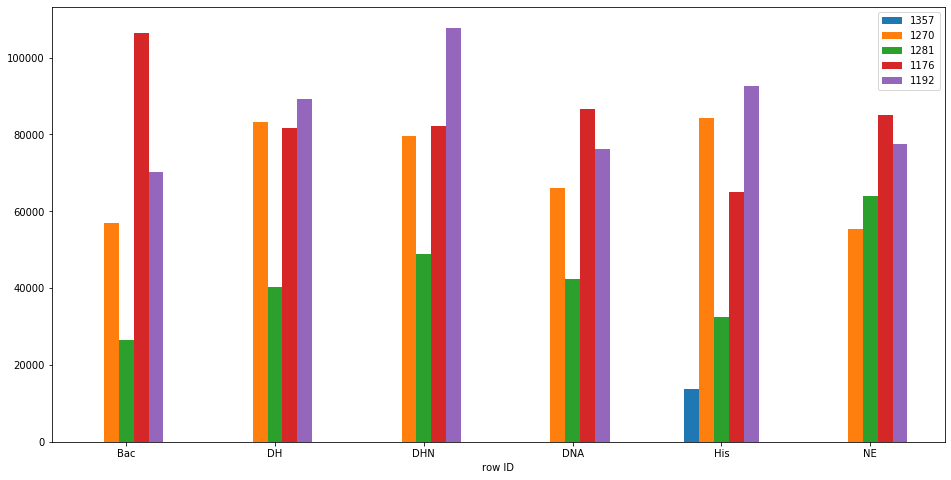

In [57]:
df_mean.loc[:, five_most_variable].plot.bar(rot=0, figsize=(16,8))

In [58]:
idx_dh = df_mean.apply(lambda a: sum(a['DH'] > a[a.index!='DH'])==12)
idx_dh_max = df_mean.loc['DH', idx_dh].sort_values()[:5].index.tolist()

In [59]:
idx_dh_max

[]